In [135]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Dead-Reackoning-Processed.csv')
len(df)

498808

In [66]:


df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['timestamp_sec'] = (df['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [70]:
### This notebook is going to have a number of algorithms for characteritic point detection in trajectories using
## X, Y and timestamp of data
#1. Algo from paper - characteristic point of trajectories
import numpy as np
import pandas as pd

def extract_trajectory_points(df, min_distance=0.001, max_distance=0.01, min_stop_duration=100, min_angle=60):
    points = df[["location-lat", "location-long", "timestamp_sec"]].to_numpy()
    n = points.shape[0]
    C = np.array([points[0]])
    i = 0
    j = i + 1
    while j < n:
        d_space = np.linalg.norm(points[j, :2] - points[i, :2])
        if d_space > max_distance:
            C = np.concatenate((C, [points[j]]))
            i = j
            j = i + 1
            continue
        k = j + 1
        while k < n:
            d_space_jk = np.linalg.norm(points[k, :2] - points[j, :2])
            if d_space_jk > min_distance:
                break
            k += 1
        if k >= n:
            break
        if k > j + 1:
            d_time = points[k-1, 2] - points[j, 2]
            if d_time > min_stop_duration:
                C = np.concatenate((C, [points[j]]))
                i = j
                j = k
                continue
            else:
                Xave, Yave = np.mean(points[j:k, :2], axis=0)
                d_space_j = np.linalg.norm(points[j, :2] - np.array([Xave, Yave]))
                m = np.argmin([np.linalg.norm(points[l, :2] - np.array([Xave, Yave])) for l in range(j, k)])
                if d_space_j < d_space_jk and np.abs(np.angle(np.dot(points[j, :2] - points[i, :2], points[m, :2] - points[j, :2]) / (d_space * d_space_j))) > np.deg2rad(min_angle):
                    C = np.concatenate((C, [points[j]]))
                    i = j
                    j = k
                    continue
                else:
                    j = m
        else:
            a_turn = np.abs(np.angle(np.dot(points[i+1, :2] - points[i, :2], points[k, :2] - points[j, :2]) / (d_space * d_space_jk)))
            if a_turn > np.deg2rad(min_angle):
                C = np.concatenate((C, [points[j]]))
            j = k
    C = np.concatenate((C, [points[-1]]))
    return pd.DataFrame(C, columns=["location-lat", "location-long", "timestamp"])




In [71]:
extract_trajectory_points(df,)

KeyboardInterrupt: 

In [88]:
df_dp = df[['location-lat', 'location-long', 'timestamp_sec']]
douglas_peucker(df_dp, 10)

ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

In [109]:
from rdp import rdp
distance_metrics = 0.01
list_points = []
while(True):
    list_points.append(rdp(df_dp, distance_metrics))
    distance_metrics /= 10

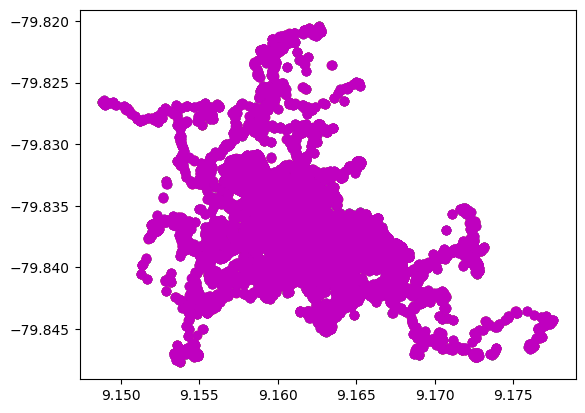

In [120]:
import matplotlib.pyplot as plt

# List of five points with X and Y coordinates
points = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

# List of five colors (one for each point)
colors = ['r', 'g', 'b', 'y', 'm']
fig, ax = plt.subplots()

# Plot the points with different colors
for i in range(5):
    df = pd.DataFrame(list_points[i], columns=['X', 'Y', 'timestamp'])

    ax.scatter(df['X'], df['Y'], c=colors[i])

# Display the chart
plt.show()



In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample dataframes
df1 = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})
df2 = pd.DataFrame({'x': [2, 4, 6], 'y': [8, 10, 12]})
df3 = pd.DataFrame({'x': [3, 6, 9], 'y': [12, 15, 18]})
df4 = pd.DataFrame({'x': [4, 8, 12], 'y': [16, 20, 24]})
df5 = pd.DataFrame({'x': [5, 10, 15], 'y': [20, 25, 30]})

# Define the figure and subplot axes
fig, axs = plt.subplots(5, 1, figsize=(150, 300))

# Plot each dataframe in a separate subplot

for i in range(5):
    df = pd.DataFrame(list_points[i], columns=['X', 'Y', 'timestamp'])
    axs[i].scatter(df['X'], df['Y'], c = colors[i])

# Show the plot
plt.show()


In [141]:
for item in list_points:
    print(len(item))

69
2644
42016
169205
407293


In [143]:
for i in range(5):
    df = pd.DataFrame(list_points[i], columns=['X', 'Y', 'timestamp'])

    df.to_csv('data/characteristic_points' + str(i) + '.csv')